**Applying Genetic Algorithm**

In [ ]:
# Install DEAP for genetic algorithms
!pip install deap

import pandas as pd
import numpy as np
from deap import base, creator, tools, algorithms
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Google Colab drive mounting
from google.colab import drive
drive.mount('/content/drive')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.6 MB/s eta 0:00:00
Mounted at /content/drive


In [ ]:
# Load the data
file_path = '/content/drive/MyDrive/Network_Anomaly_Detection/ACI-IoT.xlsx'
data = pd.read_excel(file_path)

# Handle infinite values
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Encoding categorical features
categorical_features = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_features:
    data[col] = label_encoder.fit_transform(data[col])

# Handle missing values
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Separate features and targets
X = data.drop('Label', axis=1)
y = data['Label'].astype(int)


In [ ]:
# Print column names to check the exact name of the 'Label' column
df = pd.read_excel(file_path)
print(df.columns)

Index(['Protocol', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'Down/Up Ratio',
       'Average Packet Size', 'Fwd Segment Size Avg', 'Bwd Segment Size Avg',
       'Subflow Fwd Packets', 'Subflow F

In [ ]:
# Define evaluation function first
def eval_features(individual):
    features = [X.columns[index] for index in range(len(individual)) if individual[index] == 1]
    if len(features) == 0:
        return 0,  # Handling empty feature subset

    X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.3, random_state=42)
    clf = RandomForestClassifier(n_estimators=10)  # Reduced from 100
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy,


In [ ]:
from deap import base, creator, tools

# DEAP setup for genetic algorithm

if not hasattr(creator, "FitnessMax"):
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximizing fitness function

if not hasattr(creator, "Individual"):
    creator.create("Individual", list, fitness=creator.FitnessMax)

# Setup the toolbox
toolbox = base.Toolbox()
toolbox.register("attr_bool", np.random.randint, 0, 2)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(X.columns))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", eval_features)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)




In [ ]:
# Initialize population and run the genetic algorithm
population = toolbox.population(n=30)
ngen = 20  # Number of generations
result, log = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=ngen, verbose=True)

# Print the best individual found
best_ind = tools.selBest(population, 1)[0]
print("Best individual is: %s\nwith fitness: %s" % (best_ind, best_ind.fitness.values))


gen	nevals
0  	30    
1  	16    
2  	18    
3  	22    
4  	15    
5  	12    
6  	19    
7  	19    
8  	20    
9  	17    
10 	15    
11 	18    
12 	10    
13 	21    
14 	22    
15 	12    
16 	22    
17 	27    
18 	11    
19 	22    
20 	18    
Best individual is: [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1]
with fitness: (0.996706646787868,)


**Applying Machine Learning**

In [ ]:
# Assuming 'best_ind' contains the best individual from the GA output
selected_features = [X.columns[i] for i in range(len(best_ind)) if best_ind[i] == 1]
X_selected = X[selected_features]


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data - using 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)


In [ ]:
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9969196339164518
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99     43827
           1       1.00      1.00      1.00     13991
           2       1.00      1.00      1.00      1915
           3       1.00      1.00      1.00     67595
           4       1.00      1.00      1.00     11439
           5       0.97      0.99      0.98     21810
           6       1.00      1.00      1.00    132112
           7       1.00      1.00      1.00      4166
           8       1.00      1.00      1.00      5689
           9       0.96      0.92      0.94       219
          10       1.00      1.00      1.00     11810

    accuracy                           1.00    314573
   macro avg       0.99      0.99      0.99    314573
weighted avg       1.00      1.00      1.00    314573

Confusion Matrix:
 [[ 43154     11      2     16      0    567     68      0      2      7
       0]
 [     5  13985      0      0    

**Graphs**

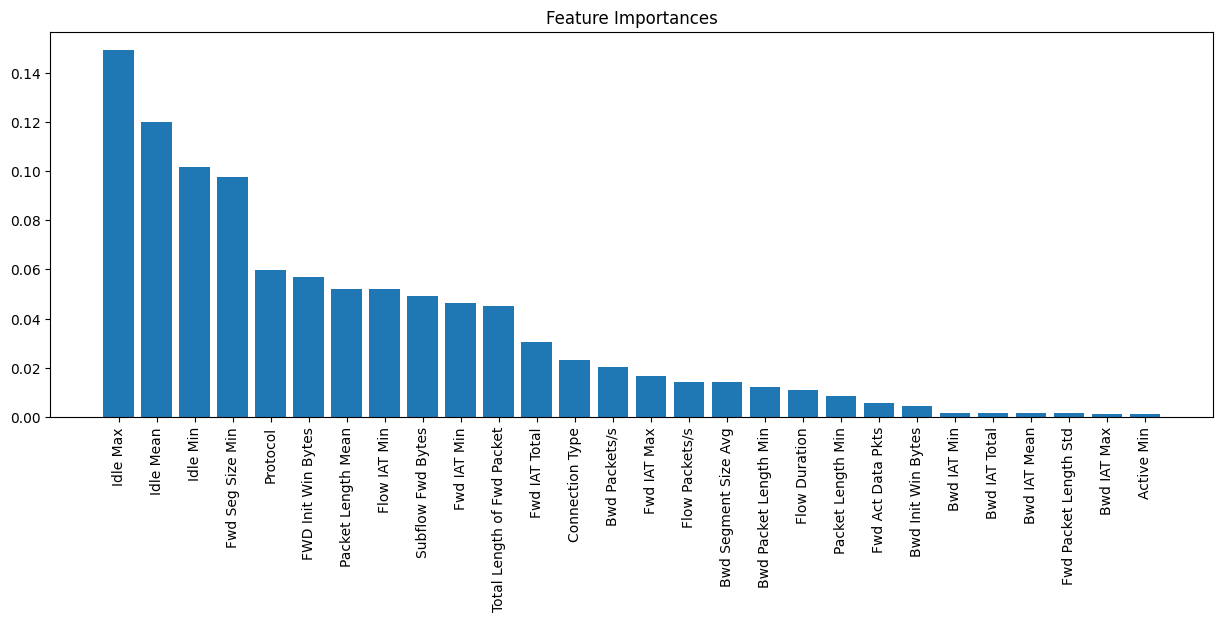

In [ ]:
#Feature Importance Visualization

import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_selected.columns[i] for i in indices]

plt.figure(figsize=(15, 5))
plt.title("Feature Importances")
plt.bar(range(X_selected.shape[1]), feature_importances[indices])
plt.xticks(range(X_selected.shape[1]), names, rotation=90)
plt.show()


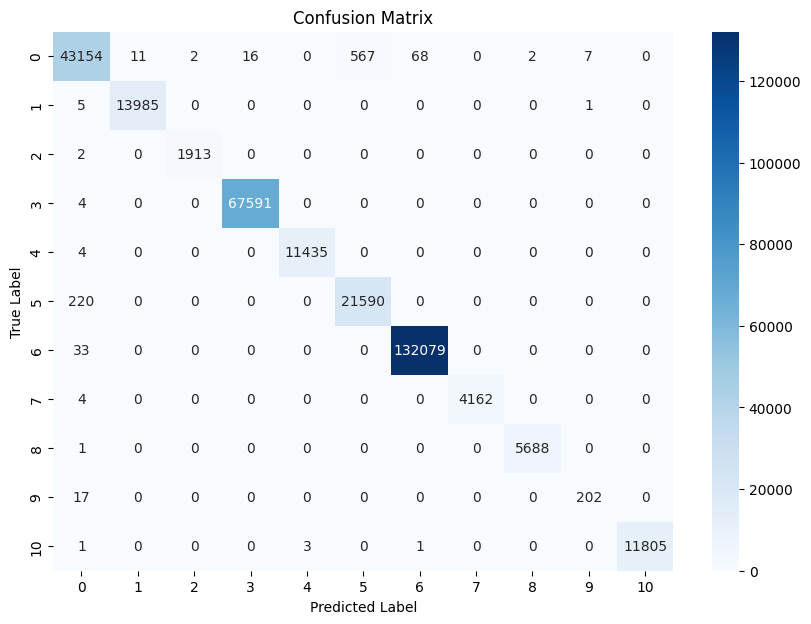

In [ ]:
#Confusion Matrix Heatmap

import seaborn as sns

# Convert confusion matrix to DataFrame for easier plotting
conf_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred), index=model.classes_, columns=model.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


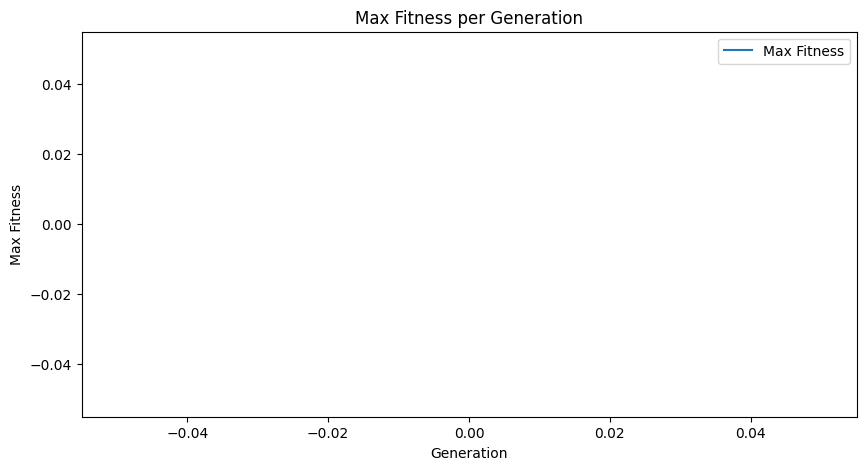

In [ ]:
#Accuracy Over Generations

# Assuming 'log' is the DEAP logbook from the genetic algorithm
gen = log.select("gen")
fit_max = log.select("max")

plt.figure(figsize=(10, 5))
plt.plot(gen, fit_max, label='Max Fitness')
plt.xlabel('Generation')
plt.ylabel('Max Fitness')
plt.title('Max Fitness per Generation')
plt.legend()
plt.show()


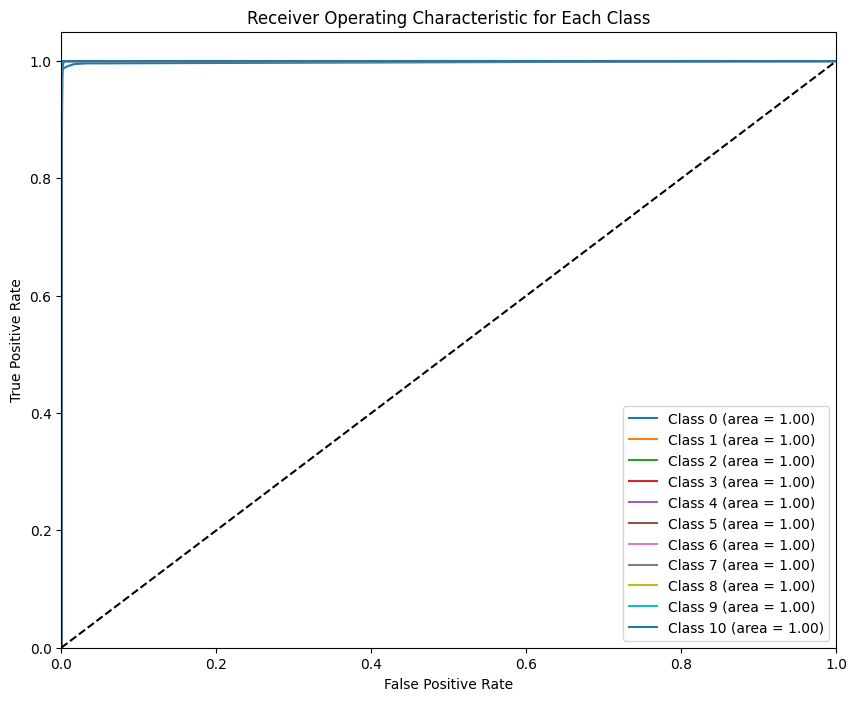

In [ ]:
#ROC Curve for Each Class

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize the output classes
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

# Split the data - using the original data before feature selection for full ROC analysis
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Learn to predict each class against the other using the RandomForestClassifier
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
classifier.fit(X_train_full, y_train_full)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_full[:, i], classifier.predict_proba(X_test_full)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Each Class')
plt.legend(loc="lower right")
plt.show()
